In [53]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

C:\Users\dusan\AppData\Local\Temp\ipykernel_24080\3777615979.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


# Lab | Natural Language Processing
### SMS: SPAM or HAM

### Let's prepare the environment

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

- Read Data for the Fraudulent Email Kaggle Challenge
- Reduce the training set to speead up development. 

In [55]:
## Read Data for the Fraudulent Email Kaggle Challenge
data = pd.read_csv("../data/kg_train.csv",encoding='latin-1')

# Reduce the training set to speed up development. 
# Modify for final system
data = data.head(1000)
print(data.shape)
data.fillna("",inplace=True)

(1000, 2)


### Let's divide the training and test set into two partitions

In [56]:
# Your code
X_train = data["text"]
y_train = data["label"]



## Data Preprocessing

In [57]:
import nltk
nltk.download('stopwords')
import string
from nltk.corpus import stopwords
print(string.punctuation)
print(stopwords.words("english")[100:110])
from nltk.stem.snowball import SnowballStemmer
snowball = SnowballStemmer('english')

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
['here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each']


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dusan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Now, we have to clean the html code removing words

- First we remove inline JavaScript/CSS
- Then we remove html comments. This has to be done before removing regular tags since comments can contain '>' characters
- Next we can remove the remaining tags

- Remove all the special characters
    
- Remove numbers
    
- Remove all single characters
 
- Remove single characters from the start

- Substitute multiple spaces with single space

- Remove prefixed 'b'

- Convert to Lowercase

In [58]:

# Function to clean text
def clean_html(text):
    # Step 1: Remove inline JavaScript and CSS
    soup = BeautifulSoup(text, "html.parser")
    for script_or_style in soup(["script", "style"]):
        script_or_style.extract()  # Remove JavaScript and CSS

    # Step 2: Remove HTML comments
    cleaned_html = re.sub(r'<!--.*?-->', '', str(soup), flags=re.DOTALL)

    # Step 3: Remove all remaining HTML tags
    soup = BeautifulSoup(cleaned_html, "html.parser")
    plain_text = soup.get_text()

    # Step 4: Remove all special characters
    plain_text = re.sub(r'[^a-zA-Z\s]', '', plain_text)

    # Step 5: Remove numbers
    plain_text = re.sub(r'\d+', '', plain_text)

    # Step 6: Remove all single characters (except valid words)
    plain_text = re.sub(r'\b\w\b', '', plain_text)

    # Step 7: Remove single characters from the start of the text
    plain_text = re.sub(r'^\w\s+', '', plain_text)

    # Step 8: Substitute multiple spaces with a single space
    plain_text = re.sub(r'\s+', ' ', plain_text).strip()

    # Step 9: Remove prefixed 'b'
    plain_text = re.sub(r'\bb\b', '', plain_text)

    # Step 10: Convert text to lowercase
    plain_text = plain_text.lower()

    return plain_text

# Apply cleaning to all entries in X_test
cleaned_X_train = [clean_html(text) for text in X_train]

print(cleaned_X_train)

C:\Users\dusan\AppData\Local\Temp\ipykernel_24080\2145370259.py:4: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")
C:\Users\dusan\AppData\Local\Temp\ipykernel_24080\2145370259.py:12: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(cleaned_html, "html.parser")
C:\Users\dusan\AppData\Local\Temp\ipykernel_24080\2145370259.py:4: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")
C:\Users\dusan\AppData\Local\Temp\ipykernel_24080\2145370259.py:12: MarkupResemblesLocatorWarning: The input looks more like a URL than marku

['dear sir strictly private business proposal am mike chukwu the manager bills and exchange at the foreign remittance department of the zenith international bank plc am writing this letter to ask for your support and cooperation to carry out this business opportunity in my department we discovered an abandoned sum of fifteen million united states dollars only in an account that belongs to one of our foreign customers who died along with his entire family of wife and two children in november in plane crash since we heard of his death we have been expecting his nextofkin to come over and put claims for his money as the heirbecause we cannot release the fund from his account unless someone applies for claim as the nextofkin to the deceased as indicated in our banking guidelines unfortunately neither their family member nor distant relative has ever appeared to claim the said fund upon this discoveryi and other officials in my department have agreed to make business with you and release th

In [59]:
display(cleaned_X_train)

['dear sir strictly private business proposal am mike chukwu the manager bills and exchange at the foreign remittance department of the zenith international bank plc am writing this letter to ask for your support and cooperation to carry out this business opportunity in my department we discovered an abandoned sum of fifteen million united states dollars only in an account that belongs to one of our foreign customers who died along with his entire family of wife and two children in november in plane crash since we heard of his death we have been expecting his nextofkin to come over and put claims for his money as the heirbecause we cannot release the fund from his account unless someone applies for claim as the nextofkin to the deceased as indicated in our banking guidelines unfortunately neither their family member nor distant relative has ever appeared to claim the said fund upon this discoveryi and other officials in my department have agreed to make business with you and release th

## Now let's work on removing stopwords
Remove the stopwords.

In [60]:
pip install spacy


Note: you may need to restart the kernel to use updated packages.


In [61]:
import spacy

# Download the English model directly in Python
from spacy.cli import download

download("en_core_web_sm")
# Load the spaCy English model
nlp = spacy.load('en_core_web_sm')

# Function to lemmatize and remove stopwords
def lemmatize_and_clean(text):
    doc = nlp(text)
    lemmatized_tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
    return ' '.join(lemmatized_tokens)

# Apply lemmatization and stopword removal to each text entry in X_train
cleaned_X_train = [lemmatize_and_clean(text) for text in cleaned_X_train]

# Output the cleaned data
for idx, cleaned_text in enumerate(cleaned_X_train, 1):
    print(f"Cleaned Text {idx}:\n{cleaned_text}\n")

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
Cleaned Text 1:
dear sir strictly private business proposal mike chukwu manager bill exchange foreign remittance department zenith international bank plc write letter ask support cooperation carry business opportunity department discover abandon sum million united states dollar account belong foreign customer die entire family wife child november plane crash hear death expect nextofkin come claim money heirbecause release fund account apply claim nextofkin deceased indicate banking guideline unfortunately family member distant relative appear claim say fund discoveryi official department agree business release total account heir fund come discover maintain

## Tame Your Text with Lemmatization
Break sentences into words, then use lemmatization to reduce them to their base form (e.g., "running" becomes "run"). See how this creates cleaner data for analysis!

In [62]:
# Your code

# Function to tokenize, lemmatize, and remove stopwords
def lemmatize_and_clean(text):
    # Process the text using spaCy
    doc = nlp(text)
    
    # Extract the lemma for each token, skipping stopwords and punctuation
    lemmatized_tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
    
    # Return the cleaned, lemmatized text
    return ' '.join(lemmatized_tokens)


# Apply lemmatization to each sentence
cleaned_X_train = [lemmatize_and_clean(text) for text in cleaned_X_train]

# Output the results
for idx, cleaned_text in enumerate(cleaned_X_train, 1):
    print(f"Cleaned Text {idx}:\n{cleaned_text}\n")

Cleaned Text 1:
dear sir strictly private business proposal mike chukwu manager bill exchange foreign remittance department zenith international bank plc write letter ask support cooperation carry business opportunity department discover abandon sum million united states dollar account belong foreign customer die entire family wife child november plane crash hear death expect nextofkin come claim money heirbecause release fund account apply claim nextofkin deceased indicate banking guideline unfortunately family member distant relative appear claim fund discoveryi official department agree business release total account heir fund come discover maintain account bank fund return bank treasury unclaimed fund agree ratio share state foreign partner official department settlement local foreign expence incur course business successful completion transfer colleague come country mind share intend import agricultural machinery country way recycle fund commence transaction require immediately in

## Bag Of Words
Let's get the 10 top words in ham and spam messages (**EXPLORATORY DATA ANALYSIS**)

In [63]:
# Your code

import pandas as pd
from collections import Counter

# Create a DataFrame to store text and labels
df = pd.DataFrame({'text': cleaned_X_train, 'label': y_train})

# Assuming 1 is spam and 0 is ham
spam_messages = df[df['label'] == 1]['text']
ham_messages = df[df['label'] == 0]['text']


In [64]:
# Function to get top N words
def get_top_words(messages, n=10):
    all_words = ' '.join(messages).split()  # Combine all messages and split into words
    word_freq = Counter(all_words)  # Count word frequencies
    return word_freq.most_common(n)  # Return the top N words

# Get top 10 words for spam and ham messages
top_spam_words = get_top_words(spam_messages, 10)
top_ham_words = get_top_words(ham_messages, 10)

# Display the top words
print("Top 10 words in Spam messages:", top_spam_words)
print("Top 10 words in Ham messages:", top_ham_words)


Top 10 words in Spam messages: [('money', 920), ('account', 795), ('bank', 749), ('fund', 710), ('transfer', 519), ('business', 474), ('contact', 441), ('transaction', 416), ('country', 400), ('million', 384)]
Top 10 words in Ham messages: [('pm', 115), ('work', 104), ('president', 94), ('state', 91), ('time', 82), ('percent', 77), ('obama', 66), ('mr', 66), ('office', 61), ('new', 58)]


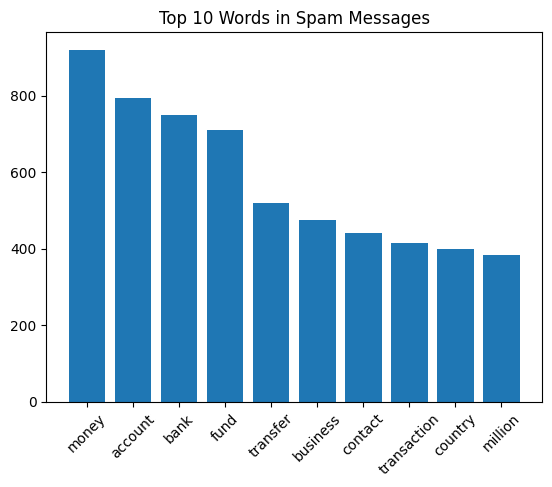

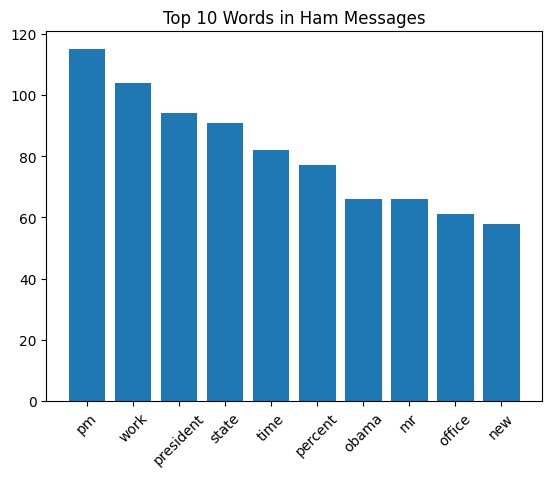

In [65]:
import matplotlib.pyplot as plt

# Function to plot top N words
def plot_top_words(word_freq, title):
    words, counts = zip(*word_freq)
    plt.bar(words, counts)
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()

# Plot top words for spam and ham
plot_top_words(top_spam_words, 'Top 10 Words in Spam Messages')
plot_top_words(top_ham_words, 'Top 10 Words in Ham Messages')


## Extra features

In [66]:
import pandas as pd
import re

# Assuming cleaned_X_train contains your cleaned, lemmatized text
# And y_train contains your labels (0 for ham, 1 for spam)

# Create a DataFrame from your cleaned text and labels
data_train = pd.DataFrame({'preprocessed_text': cleaned_X_train, 'label': y_train})

# Define the list of money symbols and suspicious words
money_simbol_list = "|".join(["euro", "dollar", "pound", "€", "\\$"])
suspicious_words = "|".join(["free", "cheap", "sex", "money", "account", "bank", "fund", "transfer", "transaction", "win", "deposit", "password"])

# Add indicators for money-related terms, suspicious words, and text length
data_train['money_mark'] = data_train['preprocessed_text'].str.contains(money_simbol_list, case=False) * 1
data_train['suspicious_words'] = data_train['preprocessed_text'].str.contains(suspicious_words, case=False) * 1
data_train['text_len'] = data_train['preprocessed_text'].apply(lambda x: len(x))

# Display the first few rows to check the added features
print(data_train[['preprocessed_text', 'money_mark', 'suspicious_words', 'text_len']].head())

# If you want to create a validation set, just split the data or copy data_train
# For example, we can create a simple validation set by splitting the data
from sklearn.model_selection import train_test_split

data_train, data_val = train_test_split(data_train, test_size=0.2, random_state=42)

# Apply the same feature generation for the validation set if it's not already done
data_val['money_mark'] = data_val['preprocessed_text'].str.contains(money_simbol_list, case=False) * 1
data_val['suspicious_words'] = data_val['preprocessed_text'].str.contains(suspicious_words, case=False) * 1
data_val['text_len'] = data_val['preprocessed_text'].apply(lambda x: len(x))

# Display the validation set features
print(data_val[['preprocessed_text', 'money_mark', 'suspicious_words', 'text_len']].head())


                                   preprocessed_text  money_mark  \
0  dear sir strictly private business proposal mi...           1   
1                                                              0   
2  noracheryl email dozen memo haiti weekend prin...           0   
3  dear sirfmadamc know proposal surprise emergen...           1   
4                                                fyi           0   

   suspicious_words  text_len  
0                 1      1309  
1                 0         0  
2                 0       101  
3                 1      1249  
4                 0         3  
                                     preprocessed_text  money_mark  \
521  dear sirc wish offer consider partnerei mresam...           0   
737  mind balkan second great plug global entrepren...           0   
740                                    pls update come           0   
660  christ bethel hospital rue aboboteabidjanivory...           0   
411  sbwhoeopfriday february amhre bravo brava is

## How would work the Bag of Words with Count Vectorizer concept?

In [67]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the CountVectorizer with additional parameters
vectorizer = CountVectorizer(
    lowercase=True,            # Convert all text to lowercase
    stop_words='english',      # Remove common English stopwords
    max_features=1000,         # Limit to the top 1000 most frequent words
    min_df=5,                  # Ignore words that appear in less than 5 documents
    max_df=0.7                 # Ignore words that appear in more than 70% of the documents
)

# Fit the vectorizer to the cleaned training data and transform the data into a document-term matrix
X_train_bow = vectorizer.fit_transform(cleaned_X_train)

# Convert the sparse matrix into a dense format (optional, but can be useful for exploration)
X_train_bow_dense = X_train_bow.toarray()

# Show the shape of the resulting document-term matrix
print("Shape of document-term matrix:", X_train_bow_dense.shape)

# Print out the first few rows of the matrix (optional)
print("First few rows of the Bag of Words matrix:")
print(X_train_bow_dense[:5])

# Get the feature names (words in the vocabulary)
feature_names = vectorizer.get_feature_names_out()

# Display the top 10 words in the vocabulary (for reference)
print("Top 10 words in the vocabulary:")
print(feature_names[:10])


Shape of document-term matrix: (1000, 1000)
First few rows of the Bag of Words matrix:
[[0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Top 10 words in the vocabulary:
['abacha' 'abandon' 'abidjan' 'able' 'abroad' 'absolute' 'ac' 'accept'
 'acceptable' 'acceptance']


## TD-IDF

- Load the vectorizer

- Vectorize all dataset

- print the shape of the vetorized dataset

In [68]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(
    lowercase=True,            # Convert all text to lowercase
    stop_words='english',      # Remove common English stopwords
    max_features=1000,         # Limit to the top 1000 most important words
    min_df=5,                  # Ignore words that appear in less than 5 documents
    max_df=0.7                 # Ignore words that appear in more than 70% of the documents
)

# Fit the vectorizer to the cleaned training data and transform the data into a TF-IDF matrix
X_train_tfidf = tfidf_vectorizer.fit_transform(cleaned_X_train)

# Convert the sparse matrix into a dense format (optional, for exploration)
X_train_tfidf_dense = X_train_tfidf.toarray()

# Show the shape of the resulting TF-IDF matrix
print("Shape of the TF-IDF matrix:", X_train_tfidf_dense.shape)

# Optionally print the first few rows of the matrix
print("First few rows of the TF-IDF matrix:")
print(X_train_tfidf_dense[:5])

# Get the feature names (words in the vocabulary)
feature_names = tfidf_vectorizer.get_feature_names_out()

# Display the top 10 words in the vocabulary (for reference)
print("Top 10 words in the vocabulary:")
print(feature_names[:10])


Shape of the TF-IDF matrix: (1000, 1000)
First few rows of the TF-IDF matrix:
[[0.         0.08302499 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
Top 10 words in the vocabulary:
['abacha' 'abandon' 'abidjan' 'able' 'abroad' 'absolute' 'ac' 'accept'
 'acceptable' 'acceptance']


## And the Train a Classifier?

In [47]:
# Your code

from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Split the data into training and testing sets
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_train_tfidf, y_train, test_size=0.2, random_state=42)

# Initialize the Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()

# Train the classifier on the training data
nb_classifier.fit(X_train_tfidf, y_train)

# Make predictions on the test data
y_pred = nb_classifier.predict(X_test_tfidf)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Print classification report for precision, recall, and F1-score
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Display the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 93.00%
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.93      0.94       125
           1       0.89      0.93      0.91        75

    accuracy                           0.93       200
   macro avg       0.92      0.93      0.93       200
weighted avg       0.93      0.93      0.93       200

Confusion Matrix:
[[116   9]
 [  5  70]]


### Extra Task - Implement a SPAM/HAM classifier

https://www.kaggle.com/t/b384e34013d54d238490103bc3c360ce

The classifier can not be changed!!! It must be the MultinimialNB with default parameters!

Your task is to find the **best feature representation**.

You can work with teams of two persons (recommended).

In [69]:
# Your code
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Step 1: Split the data into training and testing sets BEFORE feature extraction
X_train, X_test, y_train, y_test = train_test_split(cleaned_X_train, y_train, test_size=0.2, random_state=42)

# Step 2: Feature extraction using Bag of Words (CountVectorizer)
count_vectorizer = CountVectorizer()
X_train_bow = count_vectorizer.fit_transform(X_train)
X_test_bow = count_vectorizer.transform(X_test)

# Step 3: Feature extraction using TF-IDF (TfidfVectorizer)
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Step 4: Train and evaluate the Multinomial Naive Bayes classifier for Bag of Words
nb_classifier = MultinomialNB()

# Train using Bag of Words
nb_classifier.fit(X_train_bow, y_train)

# Predict on the test data
y_pred_bow = nb_classifier.predict(X_test_bow)

# Print evaluation metrics for Bag of Words
print("Bag of Words - Accuracy:", accuracy_score(y_test, y_pred_bow))
print("Bag of Words - Classification Report:\n", classification_report(y_test, y_pred_bow))
print("Bag of Words - Confusion Matrix:\n", confusion_matrix(y_test, y_pred_bow))

# Step 5: Train and evaluate the Multinomial Naive Bayes classifier for TF-IDF
nb_classifier.fit(X_train_tfidf, y_train)

# Predict on the test data
y_pred_tfidf = nb_classifier.predict(X_test_tfidf)

# Print evaluation metrics for TF-IDF
print("TF-IDF - Accuracy:", accuracy_score(y_test, y_pred_tfidf))
print("TF-IDF - Classification Report:\n", classification_report(y_test, y_pred_tfidf))
print("TF-IDF - Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tfidf))


Bag of Words - Accuracy: 0.935
Bag of Words - Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.91      0.95       125
           1       0.87      0.97      0.92        75

    accuracy                           0.94       200
   macro avg       0.93      0.94      0.93       200
weighted avg       0.94      0.94      0.94       200

Bag of Words - Confusion Matrix:
 [[114  11]
 [  2  73]]
TF-IDF - Accuracy: 0.91
TF-IDF - Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.86      0.92       125
           1       0.81      0.99      0.89        75

    accuracy                           0.91       200
   macro avg       0.90      0.93      0.91       200
weighted avg       0.92      0.91      0.91       200

TF-IDF - Confusion Matrix:
 [[108  17]
 [  1  74]]
